In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from scipy.optimize import curve_fit
from google.colab import files
#Erickyhilbert123

In [ ]:
#Para leer datos desde Google Drive: 
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
cgp00=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp00.xlsx')
cgp05=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp05.xls',sheet_name=2)
cgp10=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp10.xlsx')
cgp20=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp20.xlsx')
cgp50=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp50.xlsx',sheet_name=1)
cgp60=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp60.xlsx',sheet_name=1)
cgp70=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp70.xlsx',sheet_name=1)
cgp80=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp80.xlsx',sheet_name=2)
cgp90=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp90.xlsx',sheet_name=2)
cgp95=pd.read_excel('/content/drive/MyDrive/BD Proyecto/cgp95.xlsx',sheet_name=2)

In [ ]:
#Nombre a columnas y eliminar filas especificas
cgp00.columns=cgp00.iloc[3]
cgp05.columns=cgp05.iloc[4]
cgp10.columns=cgp10.iloc[3]
cgp20.columns=cgp20.iloc[3]
cgp50.columns=cgp50.iloc[3]
cgp60.columns=cgp60.iloc[3]
cgp70.columns=cgp70.iloc[3]
cgp80.columns=cgp80.iloc[3]
cgp90.columns=cgp90.iloc[3]
cgp95.columns=cgp95.iloc[4]
cgp95= cgp95.drop(4, axis=0)

In [ ]:
regiones50 = {
'Acapulco de Juárez': 'Acapulco',
'Ayutla de los Libres': 'Costa Chica',
'Azoyú': 'Costa Chica',
'Copala': 'Costa Chica',
'Cuautepec': 'Costa Chica',
'Cuajinicuilapa': 'Costa Chica',
'Florencio Villarreal': 'Costa Chica',
'Igualapa': 'Costa Chica',
'Tlacoachixtlahuaca': 'Costa Chica',
'Ometepec': 'Costa Chica',
'San Luis Acatlán': 'Costa Chica',
'San Marcos': 'Costa Chica',
'Tecoanapa': 'Costa Chica',
'Xochistlahuaca': 'Costa Chica',
'Atoyac de Álvarez': 'Costa Grande',
'Benito Juárez': 'Costa Grande',
'Coahuayutla de Guerrero': 'Costa Grande',
'Coyuca de Benítez': 'Costa Grande',
'Petatlán': 'Costa Grande',
'Tecpan de Galeana': 'Costa Grande',
'Unión, La': 'Costa Grande',
'Chilapa': 'Centro',
'Chilpancingo de los Bravos': 'Centro',
'Zumpango del Río': 'Centro',
'General Heliodoro Castillo': 'Centro',
'Leonardo Bravo': 'Centro',
'Mártir de Cuilapan': 'Centro',
'Mochitlán': 'Centro',
'Quechultenango': 'Centro',
'Tixtla de Guerrero': 'Centro',
'Zitlala': 'Centro',
'Alcozauca de Guerrero': 'La Montaña',
'Alpoyeca': 'La Montaña',
'Atlamajalcingo del Monte': 'La Montaña',
'Atlixtac': 'La Montaña',
'Ahuacuotzingo': 'La Montaña',
'Cualác': 'La Montaña',
'Huamuxtitlán': 'La Montaña',
'Malinaltepec': 'La Montaña',
'Metlatónoc': 'La Montaña',
'Olinalá': 'La Montaña',
'Tlacoapa': 'La Montaña',
'Tlalixtaquilla': 'La Montaña',
'Copanatoyac': 'La Montaña',
'Tlapa': 'La Montaña',
'Xalpatláhuac': 'La Montaña',
'Xochihuehuetlán': 'La Montaña',
'Zapotitlán': 'La Montaña',
'Apaxtla': 'Norte',
'Atenango del Río': 'Norte',
'Buenavista de Cuéllar': 'Norte',
'Cocula': 'Norte',
'Copalillo': 'Norte',
'Cuetzala del Progreso': 'Norte',
'Huitzuco': 'Norte',
'Iguala': 'Norte',
'Ixcateopan': 'Norte',
'Pedro Ascencio Alquisiras': 'Norte',
'Pilcaya': 'Norte',
'Taxco de Alarcón': 'Norte',
'Teloloapan': 'Norte',
'Tepecoacuilco de Trujano': 'Norte',
'Tetipac': 'Norte',
'Ajuchitlán del Progreso': 'Tierra Caliente',  
'Arcelia': 'Tierra Caliente',
'Coyuca de Catalán': 'Tierra Caliente',
'Cutzamala de Pinzón': 'Tierra Caliente',
'Pungarabato': 'Tierra Caliente',
'San Miguel Totolapan': 'Tierra Caliente',
'Tlalchapa': 'Tierra Caliente',
'Tlapehuala': 'Tierra Caliente',
'Zirándaro': 'Tierra Caliente' 
}

In [ ]:
regiones60 = {
  'Acapulco': 'Acapulco',
  'Ayutla': 'Costa Chica',
  'Azoyú': 'Costa Chica',
  'Copala': 'Costa Chica',
  'Cuautepec': 'Costa Chica',
  'Cuajinicuilapa': 'Costa Chica',
  'Florencio Villarreal': 'Costa Chica',
  'Igualapa': 'Costa Chica',
  'Tlacoachistlahuaca': 'Costa Chica',
  'Ometepec': 'Costa Chica',
  'San Luis Acatlán': 'Costa Chica',
  'San Marcos': 'Costa Chica',
  'Tecoanapa': 'Costa Chica',
  'Xochistlahuaca': 'Costa Chica',
  'Atoyac de Álvarez': 'Costa Grande',
  'Benito Juárez': 'Costa Grande',
  'José Azueta': 'Costa Grande',
  'Coahuayutla': 'Costa Grande',
  'Coyuca de Benítez': 'Costa Grande',
  'Petatlán': 'Costa Grande',
  'Técpan': 'Costa Grande',
  'Unión, La': 'Costa Grande',
  'Chilapa': 'Centro',
  'Chilpancingo': 'Centro',
  'Zumpango del Río': 'Centro',
  'General Heliodoro Castillo': 'Centro',
  'Juan R. Escudero': 'Centro',
  'Leonardo Bravo': 'Centro',
  'Mártir de Cuilapan': 'Centro',
  'Mochitlán': 'Centro',
  'Quechultenango': 'Centro',
  'Tixtla': 'Centro',
  'Zitlala': 'Centro',
  'Alcozauca': 'La Montaña',
  'Alpoyeca': 'La Montaña',
  'Atlamajalcingo del Monte': 'La Montaña',
  'Atlixtac': 'La Montaña',
  'Ahuacuotzingo': 'La Montaña',
  'Cualác': 'La Montaña',
  'Huamuxtitlán': 'La Montaña',
  'Malinaltepec': 'La Montaña',
  'Metlatónoc': 'La Montaña',
  'Olinalá': 'La Montaña',
  'Tlacoapa': 'La Montaña',
  'Tlalixtaquilla': 'La Montaña',
  'Copanatoyac': 'La Montaña',
  'Tlapa': 'La Montaña',
  'Xalpatláhuac': 'La Montaña',
  'Xochihuehuetlán': 'La Montaña',
  'Zapotitlán': 'La Montaña',
  'Apaxtla': 'Norte',
  'Atenango del Río': 'Norte',
  'Buenavista de Cuéllar': 'Norte',
  'Cocula': 'Norte',
  'Copalillo': 'Norte',
  'Cuetzala': 'Norte',
  'Huitzuco': 'Norte',
  'Iguala': 'Norte',
  'Ixcateopan': 'Norte',
  'Pedro Ascencio Alquisiras': 'Norte',
  'Pilcaya': 'Norte',
  'Taxco': 'Norte',
  'Teloloapan': 'Norte',
  'Tepecoacuilco': 'Norte',
  'Tetipac': 'Norte',
  'General Canuto A. Neri': 'Norte',
  'Ajuchitlán': 'Tierra Caliente',
  'Arcelia': 'Tierra Caliente',
  'Coyuca de Catalán': 'Tierra Caliente',
  'Cutzamala de Pinzón': 'Tierra Caliente',
  'Pungarabato': 'Tierra Caliente',
  'San Miguel Totolapan': 'Tierra Caliente',
  'Tlalchapa': 'Tierra Caliente',
  'Tlapehuala': 'Tierra Caliente',
  'Zirándaro': 'Tierra Caliente' 
}

In [ ]:
regiones70 = {
    'Acapulco': 'Acapulco',
    'Ayutla': 'Costa Chica',
    'Azoyú': 'Costa Chica',
    'Copala': 'Costa Chica',
    'Cuautepec': 'Costa Chica',
    'Cuajinicuilapa': 'Costa Chica',
    'Florencio Villarreal': 'Costa Chica',
    'Igualapa': 'Costa Chica',
    'Tlacoachistlahuaca': 'Costa Chica',
    'Ometepec': 'Costa Chica',
    'San Luis Acatlán': 'Costa Chica',
    'San Marcos': 'Costa Chica',
    'Tecoanapa': 'Costa Chica',
    'Xochistlahuaca': 'Costa Chica',
    'Atoyac de Álvarez': 'Costa Grande',
    'Benito Juárez': 'Costa Grande',
    'José Azueta': 'Costa Grande',
    'Coahuayutla': 'Costa Grande',
    'Coyuca de Benítez': 'Costa Grande',
    'Petatlán': 'Costa Grande',
    'Tecpan': 'Costa Grande',
    'Unión, La': 'Costa Grande',
    'Chilapa': 'Centro',
    'Chilpancingo': 'Centro',
    'Zumpango del Río': 'Centro',
    'General Heliodoro Castillo': 'Centro',
    'Juan R. Escudero': 'Centro',
    'Leonardo Bravo': 'Centro',
    'Mártir de Cuilapan': 'Centro',
    'Mochitlán': 'Centro',
    'Quechultenango': 'Centro',
    'Tixtla': 'Centro',
    'Zitlala': 'Centro',
    'Alcozauca': 'La Montaña',
    'Alpoyeca': 'La Montaña',
    'Atlamajalcingo del Monte': 'La Montaña',
    'Atlixtac': 'La Montaña',
    'Ahuacuotzingo': 'La Montaña',
    'Cualac': 'La Montaña',
    'Huamuxtitlán': 'La Montaña',
    'Malinaltepec': 'La Montaña',
    'Metlatonoc': 'La Montaña',
    'Olinalá': 'La Montaña',
    'Tlacoapa': 'La Montaña',
    'Tlalixtaquilla': 'La Montaña',
    'Copanatoyac': 'La Montaña',
    'Tlapa': 'La Montaña',
    'Xalpatlahuac': 'La Montaña',
    'Xochihuehuetlán': 'La Montaña',
    'Zapotitlán Tablas': 'La Montaña',
    'Apaxtla': 'Norte',
    'Atenango del Río': 'Norte',
    'Buenavista de Cuéllar': 'Norte',
    'Cocula': 'Norte',
    'Copalillo': 'Norte',
    'Cuetzala': 'Norte',
    'Huitzuco': 'Norte',
    'Iguala': 'Norte',
    'Ixcateopan': 'Norte',
    'Pedro Ascencio Alquisiras': 'Norte',
    'Pilcaya': 'Norte',
    'Taxco': 'Norte',
    'Teloloapan': 'Norte',
    'Tepecoacuilco': 'Norte',
    'Tetipac': 'Norte',
    'General Canuto A. Neri': 'Norte',
    'Ajuchitlán': 'Tierra Caliente',
    'Arcelia': 'Tierra Caliente',
    'Coyuca de Catalán': 'Tierra Caliente',
    'Cutzamala de Pinzón': 'Tierra Caliente',
    'Pungarabato': 'Tierra Caliente',
    'San Miguel Totolapan': 'Tierra Caliente',
    'Tlalchapa': 'Tierra Caliente',
    'Tlapehuala': 'Tierra Caliente',
    'Zirándaro': 'Tierra Caliente' 
}

In [ ]:
regiones80 = {
    '001 Acapulco de Juárez': 'Acapulco',
    '002 Ahuacuotzingo': 'La Montaña',
    '003 Ajuchitlán del Progreso': 'Tierra Caliente',
    '004 Alcozauca de Guerrero': 'La Montaña',
    '005 Alpoyeca': 'La Montaña',
    '006 Apaxtla': 'Norte',
    '007 Arcelia': 'Tierra Caliente',
    '008 Atenango del Río': 'Norte',
    '009 Atlamajalcingo del Monte': 'La Montaña',
    '010 Atlixtac': 'La Montaña',
    '011 Atoyac de Álvarez': 'Costa Grande',
    '012 Ayutla de los Libres': 'Costa Chica',
    '013 Azoyú': 'Costa Chica',
    '014 Benito Juárez': 'Costa Grande',
    '015 Buenavista de Cuéllar': 'Norte',
    '016 Coahuayutla de Guerrero': 'Costa Grande',
    '017 Cocula': 'Norte',
    '018 Copala': 'Costa Chica',
    '019 Copalillo': 'Norte',
    '020 Copanatoyac': 'La Montaña',
    '021 Coyuca de Benítez': 'Costa Grande',
    '022 Coyuca de Catalán': 'Tierra Caliente',
    '023 Cuajinicuilapa': 'Costa Chica',
    '024 Cualác': 'La Montaña',
    '025 Cuautepec': 'Costa Chica',
    '026 Cuetzala del Progreso': 'Norte',
    '027 Cutzamala de Pinzón': 'Tierra Caliente',
    '028 Chilapa de Álvarez': 'Centro',
    '029 Chilpancingo de los Bravo': 'Centro',
    '030 Florencio Villarreal': 'Costa Chica',
    '031 General Canuto A. Neri': 'Norte',
    '032 General Heliodoro Castillo': 'Centro',
    '033 Huamuxtitlán': 'La Montaña',
    '034 Huitzuco de los Figueroa': 'Norte',
    '035 Iguala de la Independencia': 'Norte',    
    '036 Igualapa': 'Costa Chica',
    '037 Ixcateopan de Cuauhtémoc': 'Norte',
    '038 José Azueta': 'Costa Grande',
    '039 Juan R. Escudero': 'Centro',
    '040 Leonardo Bravo': 'Centro',
    '041 Malinaltepec': 'La Montaña',
    '042 Mártir de Cuilapan': 'Centro',
    '043 Metlatónoc': 'La Montaña',
    '044 Mochitlán': 'Centro',
    '045 Olinalá': 'La Montaña',
    '046 Ometepec': 'Costa Chica',
    '047 Pedro Ascencio Alquisiras': 'Norte',
    '048 Petatlán': 'Costa Grande',
    '049 Pilcaya': 'Norte',
    '050 Pungarabato': 'Tierra Caliente',
    '051 Quechultenango': 'Centro',
    '052 San Luis Acatlán': 'Costa Chica',
    '053 San Marcos': 'Costa Chica',
    '054 San Miguel Totolapan': 'Tierra Caliente',
    '055 Taxco de Alarcón': 'Norte',
    '056 Tecoanapa': 'Costa Chica',
    '057 Técpan de Galeana': 'Costa Grande',
    '058 Teloloapan': 'Norte',
    '059 Tepecoacuilco de Trujano': 'Norte',
    '060 Tetipac': 'Norte',
    '061 Tixtla de Guerrero': 'Centro',
    '062 Tlacoachistlahuaca': 'Costa Chica',
    '063 Tlacoapa': 'La Montaña',
    '064 Tlalchapa': 'Tierra Caliente',
    '065 Tlalixtaquilla': 'La Montaña',
    '066 Tlapa de Comonfort': 'La Montaña',
    '067 Tlapehuala': 'Tierra Caliente',
    '068 Unión, La': 'Costa Grande',
    '069 Xalpatláhuac': 'La Montaña',
    '070 Xochihuehuetlán': 'La Montaña',
    '071 Xochistlahuaca': 'Costa Chica',
    '072 Zapotitlán Tablas': 'La Montaña',
    '073 Zirándaro': 'Tierra Caliente', 
    '074 Zitlala':'Centro',
    '075 Zumpango del Rio': 'Centro'
}

In [ ]:
regiones90 = {
    'Acapulco de Juárez': 'Acapulco',
    'Ahuacuotzingo': 'La Montaña',
    'Ajuchitlán del Progreso': 'Tierra Caliente',
    'Alcozauca de Guerrero': 'La Montaña',
    'Alpoyeca': 'La Montaña',
    'Apaxtla': 'Norte',
    'Arcelia': 'Tierra Caliente',
    'Atenango del Río': 'Norte',
    'Atlamajalcingo del Monte': 'La Montaña',
    'Atlixtac': 'La Montaña',
    'Atoyac de Álvarez': 'Costa Grande',
    'Ayutla de los Libres': 'Costa Chica',
    'Azoyú': 'Costa Chica',
    'Benito Juárez': 'Costa Grande',
    'Buenavista de Cuéllar': 'Norte',
    'Coahuayutla de José María Izazaga': 'Costa Grande',
    'Cocula': 'Norte',
    'Copala': 'Costa Chica',
    'Copalillo': 'Norte',
    'Copanatoyac': 'La Montaña',
    'Coyuca de Benítez': 'Costa Grande',
    'Coyuca de Catalán': 'Tierra Caliente',
    'Cuajinicuilapa': 'Costa Chica',
    'Cualác': 'La Montaña',
    'Cuautepec': 'Costa Chica',
    'Cuetzala del Progreso': 'Norte',
    'Cutzamala de Pinzón': 'Tierra Caliente',
    'Chilapa de Álvarez': 'Centro',
    'Chilpancingo de los Bravo': 'Centro',
    'Florencio Villarreal': 'Costa Chica',
    'General Canuto A. Neri': 'Norte',
    'General Heliodoro Castillo': 'Centro',
    'Huamuxtitlán': 'La Montaña',
    'Huitzuco de los Figueroa': 'Norte',
    'Iguala de la Independencia': 'Norte',    
    'Igualapa': 'Costa Chica',
    'Ixcateopan de Cuauhtémoc': 'Norte',
    'José Azueta': 'Costa Grande',
    'Juan R. Escudero': 'Centro',
    'Leonardo Bravo': 'Centro',
    'Malinaltepec': 'La Montaña',
    'Mártir de Cuilapan': 'Centro',
    'Metlatónoc': 'La Montaña',
    'Mochitlán': 'Centro',
    'Olinalá': 'La Montaña',
    'Ometepec': 'Costa Chica',
    'Pedro Ascencio Alquisiras': 'Norte',
    'Petatlán': 'Costa Grande',
    'Pilcaya': 'Norte',
    'Pungarabato': 'Tierra Caliente',
    'Quechultenango': 'Centro',
    'San Luis Acatlán': 'Costa Chica',
    'San Marcos': 'Costa Chica',
    'San Miguel Totolapan': 'Tierra Caliente',
    'Taxco de Alarcón': 'Norte',
    'Tecoanapa': 'Costa Chica',
    'Técpan de Galeana': 'Costa Grande',
    'Teloloapan': 'Norte',
    'Tepecoacuilco de Trujano': 'Norte',
    'Tetipac': 'Norte',
    'Tixtla de Guerrero': 'Centro',
    'Tlacoachistlahuaca': 'Costa Chica',
    'Tlacoapa': 'La Montaña',
    'Tlalchapa': 'Tierra Caliente',
    'Tlalixtaquilla de Maldonado': 'La Montaña',
    'Tlapa de Comonfort': 'La Montaña',
    'Tlapehuala': 'Tierra Caliente',
    'Unión, La': 'Costa Grande',
    'Xalpatláhuac': 'La Montaña',
    'Xochihuehuetlán': 'La Montaña',
    'Xochistlahuaca': 'Costa Chica',
    'Zapotitlán Tablas': 'La Montaña',
    'Zirándaro': 'Tierra Caliente', 
    'Zitlala':'Centro',
    'Eduardo Neri': 'Centro'
}

In [ ]:
regiones95 = {
    'Acapulco de Juárez': 'Acapulco',
    'Ahuacuotzingo': 'La Montaña',
    'Ajuchitlán del Progreso': 'Tierra Caliente',
    'Alcozauca de Guerrero': 'La Montaña',
    'Alpoyeca': 'La Montaña',
    'Apaxtla': 'Norte',
    'Arcelia': 'Tierra Caliente',
    'Atenango del Río': 'Norte',
    'Atlamajalcingo del Monte': 'La Montaña',
    'Atlixtac': 'La Montaña',
    'Atoyac de Álvarez': 'Costa Grande',
    'Ayutla de los Libres': 'Costa Chica',
    'Azoyú': 'Costa Chica',
    'Benito Juárez': 'Costa Grande',
    'Buenavista de Cuéllar': 'Norte',
    'Coahuayutla de José María Izazaga': 'Costa Grande',
    'Cocula': 'Norte',
    'Copala': 'Costa Chica',
    'Copalillo': 'Norte',
    'Copanatoyac': 'La Montaña',
    'Coyuca de Benítez': 'Costa Grande',
    'Coyuca de Catalán': 'Tierra Caliente',
    'Cuajinicuilapa': 'Costa Chica',
    'Cualác': 'La Montaña',
    'Cuautepec': 'Costa Chica',
    'Cuetzala del Progreso': 'Norte',
    'Cutzamala de Pinzón': 'Tierra Caliente',
    'Chilapa de Álvarez': 'Centro',
    'Chilpancingo de los Bravo': 'Centro',
    'Florencio Villarreal': 'Costa Chica',
    'General Canuto A. Neri': 'Norte',
    'General Heliodoro Castillo': 'Centro',
    'Huamuxtitlán': 'La Montaña',
    'Huitzuco de los Figueroa': 'Norte',
    'Iguala de la Independencia': 'Norte',    
    'Igualapa': 'Costa Chica',
    'Ixcateopan de Cuauhtémoc': 'Norte',
    'José Azueta': 'Costa Grande',
    'Juan R. Escudero': 'Centro',
    'Leonardo Bravo': 'Centro',
    'Malinaltepec': 'La Montaña',
    'Mártir de Cuilapan': 'Centro',
    'Metlatónoc': 'La Montaña',
    'Mochitlán': 'Centro',
    'Olinalá': 'La Montaña',
    'Ometepec': 'Costa Chica',
    'Pedro Ascencio Alquisiras': 'Norte',
    'Petatlán': 'Costa Grande',
    'Pilcaya': 'Norte',
    'Pungarabato': 'Tierra Caliente',
    'Quechultenango': 'Centro',
    'San Luis Acatlán': 'Costa Chica',
    'San Marcos': 'Costa Chica',
    'San Miguel Totolapan': 'Tierra Caliente',
    'Taxco de Alarcón': 'Norte',
    'Tecoanapa': 'Costa Chica',
    'Técpan de Galeana': 'Costa Grande',
    'Teloloapan': 'Norte',
    'Tepecoacuilco de Trujano': 'Norte',
    'Tetipac': 'Norte',
    'Tixtla de Guerrero': 'Centro',
    'Tlacoachistlahuaca': 'Costa Chica',
    'Tlacoapa': 'La Montaña',
    'Tlalchapa': 'Tierra Caliente',
    'Tlalixtaquilla de Maldonado': 'La Montaña',
    'Tlapa de Comonfort': 'La Montaña',
    'Tlapehuala': 'Tierra Caliente',
    'Unión de Isidoro Montes de Oca, la': 'Costa Grande',
    'Xalpatláhuac': 'La Montaña',
    'Xochihuehuetlán': 'La Montaña',
    'Xochistlahuaca': 'Costa Chica',
    'Zapotitlán Tablas': 'La Montaña',
    'Zirándaro': 'Tierra Caliente', 
    'Zitlala':'Centro',
    'Eduardo Neri': 'Centro',
    'Acatepec': 'La Montaña'
}

In [ ]:
regiones00 = {
    'Acapulco de Juárez': 'Acapulco',
    'Ahuacuotzingo': 'La Montaña',
    'Ajuchitlán del Progreso': 'Tierra Caliente',
    'Alcozauca de Guerrero': 'La Montaña',
    'Alpoyeca': 'La Montaña',
    'Apaxtla': 'Norte',
    'Arcelia': 'Tierra Caliente',
    'Atenango del Río': 'Norte',
    'Atlamajalcingo del Monte': 'La Montaña',
    'Atlixtac': 'La Montaña',
    'Atoyac de Álvarez': 'Costa Grande',
    'Ayutla de los Libres': 'Costa Chica',
    'Azoyú': 'Costa Chica',
    'Benito Juárez': 'Costa Grande',
    'Buenavista de Cuéllar': 'Norte',
    'Coahuayutla de José María Izazaga': 'Costa Grande',
    'Cocula': 'Norte',
    'Copala': 'Costa Chica',
    'Copalillo': 'Norte',
    'Copanatoyac': 'La Montaña',
    'Coyuca de Benítez': 'Costa Grande',
    'Coyuca de Catalán': 'Tierra Caliente',
    'Cuajinicuilapa': 'Costa Chica',
    'Cualác': 'La Montaña',
    'Cuautepec': 'Costa Chica',
    'Cuetzala del Progreso': 'Norte',
    'Cutzamala de Pinzón': 'Tierra Caliente',
    'Chilapa de Álvarez': 'Centro',
    'Chilpancingo de los Bravo': 'Centro',
    'Florencio Villarreal': 'Costa Chica',
    'General Canuto A. Neri': 'Norte',
    'General Heliodoro Castillo': 'Centro',
    'Huamuxtitlán': 'La Montaña',
    'Huitzuco de los Figueroa': 'Norte',
    'Iguala de la Independencia': 'Norte',    
    'Igualapa': 'Costa Chica',
    'Ixcateopan de Cuauhtémoc': 'Norte',
    'José Azueta': 'Costa Grande',
    'Juan R. Escudero': 'Centro',
    'Leonardo Bravo': 'Centro',
    'Malinaltepec': 'La Montaña',
    'Mártir de Cuilapan': 'Centro',
    'Metlatónoc': 'La Montaña',
    'Mochitlán': 'Centro',
    'OLINALÁ': 'La Montaña',
    'Ometepec': 'Costa Chica',
    'Pedro Ascencio Alquisiras': 'Norte',
    'Petatlán': 'Costa Grande',
    'Pilcaya': 'Norte',
    'Pungarabato': 'Tierra Caliente',
    'Quechultenango': 'Centro',
    'San Luis Acatlán': 'Costa Chica',
    'San Marcos': 'Costa Chica',
    'San Miguel Totolapan': 'Tierra Caliente',
    'Taxco de Alarcón': 'Norte',
    'Tecoanapa': 'Costa Chica',
    'Técpan de Galeana': 'Costa Grande',
    'Teloloapan': 'Norte',
    'Tepecoacuilco de Trujano': 'Norte',
    'Tetipac': 'Norte',
    'Tixtla de Guerrero': 'Centro',
    'Tlacoachistlahuaca': 'Costa Chica',
    'Tlacoapa': 'La Montaña',
    'Tlalchapa': 'Tierra Caliente',
    'Tlalixtaquilla de Maldonado': 'La Montaña',
    'Tlapa de Comonfort': 'La Montaña',
    'Tlapehuala': 'Tierra Caliente',
    'La Unión de Isidoro Montes de Oca': 'Costa Grande',
    'Xalpatláhuac': 'La Montaña',
    'Xochihuehuetlán': 'La Montaña',
    'Xochistlahuaca': 'Costa Chica',
    'Zapotitlán Tablas': 'La Montaña',
    'Zirándaro': 'Tierra Caliente', 
    'Zitlala':'Centro',
    'Eduardo Neri': 'Centro',
    'Acatepec': 'La Montaña',
    'ZIHUATANEJO DE AZUETA': 'Costa Grande'
}

In [ ]:
regiones05 = {
    '001 Acapulco de Juárez': 'Acapulco',
    '002 Ahuacuotzingo': 'La Montaña',
    '003 Ajuchitlán del Progreso': 'Tierra Caliente',
    '004 Alcozauca de Guerrero': 'La Montaña',
    '005 Alpoyeca': 'La Montaña',
    '006 Apaxtla': 'Norte',
    '007 Arcelia': 'Tierra Caliente',
    '008 Atenango del Río': 'Norte',
    '009 Atlamajalcingo del Monte': 'La Montaña',
    '010 Atlixtac': 'La Montaña',
    '011 Atoyac de Álvarez': 'Costa Grande',
    '012 Ayutla de los Libres': 'Costa Chica',
    '013 Azoyú': 'Costa Chica',
    '014 Benito Juárez': 'Costa Grande',
    '015 Buenavista de Cuéllar': 'Norte',
    '016 Coahuayutla de José María Izazaga': 'Costa Grande',
    '017 Cocula': 'Norte',
    '018 Copala': 'Costa Chica',
    '019 Copalillo': 'Norte',
    '020 Copanatoyac': 'La Montaña',
    '021 Coyuca de Benítez': 'Costa Grande',
    '022 Coyuca de Catalán': 'Tierra Caliente',
    '023 Cuajinicuilapa': 'Costa Chica',
    '024 Cualác': 'La Montaña',
    '025 Cuautepec': 'Costa Chica',
    '026 Cuetzala del Progreso': 'Norte',
    '027 Cutzamala de Pinzón': 'Tierra Caliente',
    '028 Chilapa de Álvarez': 'Centro',
    '029 Chilpancingo de los Bravo': 'Centro',
    '030 Florencio Villarreal': 'Costa Chica',
    '031 General Canuto A. Neri': 'Norte',
    '032 General Heliodoro Castillo': 'Centro',
    '033 Huamuxtitlán': 'La Montaña',
    '034 Huitzuco de los Figueroa': 'Norte',
    '035 Iguala de la Independencia': 'Norte',    
    '036 Igualapa': 'Costa Chica',
    '037 Ixcateopan de Cuauhtémoc': 'Norte',
    '038 José Azueta': 'Costa Grande',
    '039 Juan R. Escudero': 'Centro',
    '040 Leonardo Bravo': 'Centro',
    '041 Malinaltepec': 'La Montaña',
    '042 Mártir de Cuilapan': 'Centro',
    '043 Metlatónoc': 'La Montaña',
    '044 Mochitlán': 'Centro',
    '045 Olinalá\xa0': 'La Montaña',
    '046 Ometepec': 'Costa Chica',
    '047 Pedro Ascencio Alquisiras': 'Norte',
    '048 Petatlán': 'Costa Grande',
    '049 Pilcaya': 'Norte',
    '050 Pungarabato': 'Tierra Caliente',
    '051 Quechultenango': 'Centro',
    '052 San Luis Acatlán': 'Costa Chica',
    '053 San Marcos': 'Costa Chica',
    '054 San Miguel Totolapan': 'Tierra Caliente',
    '055 Taxco de Alarcón': 'Norte',
    '056 Tecoanapa': 'Costa Chica',
    '057 Técpan de Galeana': 'Costa Grande',
    '058 Teloloapan': 'Norte',
    '059 Tepecoacuilco de Trujano': 'Norte',
    '060 Tetipac': 'Norte',
    '061 Tixtla de Guerrero': 'Centro',
    '062 Tlacoachistlahuaca': 'Costa Chica',
    '063 Tlacoapa': 'La Montaña',
    '064 Tlalchapa': 'Tierra Caliente',
    '065 Tlalixtaquilla de Maldonado': 'La Montaña',
    '066 Tlapa de Comonfort': 'La Montaña',
    '067 Tlapehuala': 'Tierra Caliente',
    '068 La Unión de Isidoro Montes de Oca': 'Costa Grande',
    '069 Xalpatláhuac': 'La Montaña',
    '070 Xochihuehuetlán': 'La Montaña',
    '071 Xochistlahuaca': 'Costa Chica',
    '072 Zapotitlán Tablas': 'La Montaña',
    '073 Zirándaro': 'Tierra Caliente', 
    '074 Zitlala':'Centro',
    '075 Zumpango del Rio': 'Centro',
    '075 Eduardo Neri': 'Centro',
    '076 Acatepec': 'La Montaña',
    '077 Marquelia': 'Costa Chica',
    '078 Cochoapa el Grande': 'La Montaña',
    '079 José Joaquín de Herrera': 'Centro',
    '080 Juchitán': 'Costa Chica',
    '081 Iliatenco': 'La Montaña'
}

In [ ]:
regiones10 = {
    'Acapulco de Juárez': 'Acapulco',
    'Ahuacuotzingo': 'La Montaña',
    'Ajuchitlán del Progreso': 'Tierra Caliente',
    'Alcozauca de Guerrero': 'La Montaña',
    'Alpoyeca': 'La Montaña',
    'Apaxtla': 'Norte',
    'Arcelia': 'Tierra Caliente',
    'Atenango del Río': 'Norte',
    'Atlamajalcingo del Monte': 'La Montaña',
    'Atlixtac': 'La Montaña',
    'Atoyac de Álvarez': 'Costa Grande',
    'Ayutla de los Libres': 'Costa Chica',
    'Azoyú': 'Costa Chica',
    'Benito Juárez': 'Costa Grande',
    'Buenavista de Cuéllar': 'Norte',
    'Coahuayutla de José María Izazaga': 'Costa Grande',
    'Cocula': 'Norte',
    'Copala': 'Costa Chica',
    'Copalillo': 'Norte',
    'Copanatoyac': 'La Montaña',
    'Coyuca de Benítez': 'Costa Grande',
    'Coyuca de Catalán': 'Tierra Caliente',
    'Cuajinicuilapa': 'Costa Chica',
    'Cualác': 'La Montaña',
    'Cuautepec': 'Costa Chica',
    'Cuetzala del Progreso': 'Norte',
    'Cutzamala de Pinzón': 'Tierra Caliente',
    'Chilapa de Álvarez': 'Centro',
    'Chilpancingo de los Bravo': 'Centro',
    'Florencio Villarreal': 'Costa Chica',
    'General Canuto A. Neri': 'Norte',
    'General Heliodoro Castillo': 'Centro',
    'Huamuxtitlán': 'La Montaña',
    'Huitzuco de los Figueroa': 'Norte',
    'Iguala de la Independencia': 'Norte',    
    'Igualapa': 'Costa Chica',
    'Ixcateopan de Cuauhtémoc': 'Norte',
    'José Azueta': 'Costa Grande',
    'Juan R. Escudero': 'Centro',
    'Leonardo Bravo': 'Centro',
    'Malinaltepec': 'La Montaña',
    'Mártir de Cuilapan': 'Centro',
    'Metlatónoc': 'La Montaña',
    'Mochitlán': 'Centro',
    'OLINALÁ': 'La Montaña',
    'Ometepec': 'Costa Chica',
    'Pedro Ascencio Alquisiras': 'Norte',
    'Petatlán': 'Costa Grande',
    'Pilcaya': 'Norte',
    'Pungarabato': 'Tierra Caliente',
    'Quechultenango': 'Centro',
    'San Luis Acatlán': 'Costa Chica',
    'San Marcos': 'Costa Chica',
    'San Miguel Totolapan': 'Tierra Caliente',
    'Taxco de Alarcón': 'Norte',
    'Tecoanapa': 'Costa Chica',
    'Técpan de Galeana': 'Costa Grande',
    'Teloloapan': 'Norte',
    'Tepecoacuilco de Trujano': 'Norte',
    'Tetipac': 'Norte',
    'Tixtla de Guerrero': 'Centro',
    'Tlacoachistlahuaca': 'Costa Chica',
    'Tlacoapa': 'La Montaña',
    'Tlalchapa': 'Tierra Caliente',
    'Tlalixtaquilla de Maldonado': 'La Montaña',
    'Tlapa de Comonfort': 'La Montaña',
    'Tlapehuala': 'Tierra Caliente',
    'La Unión de Isidoro Montes de Oca': 'Costa Grande',
    'Xalpatláhuac': 'La Montaña',
    'Xochihuehuetlán': 'La Montaña',
    'Xochistlahuaca': 'Costa Chica',
    'Zapotitlán Tablas': 'La Montaña',
    'Zirándaro': 'Tierra Caliente', 
    'Zitlala':'Centro',
    'Eduardo Neri': 'Centro',
    'Acatepec': 'La Montaña',
    'ZIHUATANEJO DE AZUETA': 'Costa Grande',
    'Marquelia': 'Costa Chica',
    'Cochoapa el Grande': 'La Montaña',
    'JOSÉ JOAQUIN DE HERRERA': 'Centro',
    'Juchitán': 'Costa Chica',
    'Iliatenco': 'La Montaña'
}

In [ ]:
regiones20 = {
    'Acapulco de Juárez': 'Acapulco',
    'Ahuacuotzingo': 'La Montaña',
    'Ajuchitlán del Progreso': 'Tierra Caliente',
    'Alcozauca de Guerrero': 'La Montaña',
    'Alpoyeca': 'La Montaña',
    'Apaxtla': 'Norte',
    'Arcelia': 'Tierra Caliente',
    'Atenango del Río': 'Norte',
    'Atlamajalcingo del Monte': 'La Montaña',
    'Atlixtac': 'La Montaña',
    'Atoyac de Álvarez': 'Costa Grande',
    'Ayutla de los Libres': 'Costa Chica',
    'Azoyú': 'Costa Chica',
    'Benito Juárez': 'Costa Grande',
    'Buenavista de Cuéllar': 'Norte',
    'Coahuayutla de José María Izazaga': 'Costa Grande',
    'Cocula': 'Norte',
    'Copala': 'Costa Chica',
    'Copalillo': 'Norte',
    'Copanatoyac': 'La Montaña',
    'Coyuca de Benítez': 'Costa Grande',
    'Coyuca de Catalán': 'Tierra Caliente',
    'Cuajinicuilapa': 'Costa Chica',
    'Cualác': 'La Montaña',
    'Cuautepec': 'Costa Chica',
    'Cuetzala del Progreso': 'Norte',
    'Cutzamala de Pinzón': 'Tierra Caliente',
    'Chilapa de Álvarez': 'Centro',
    'Chilpancingo de los Bravo': 'Centro',
    'Florencio Villarreal': 'Costa Chica',
    'General Canuto A. Neri': 'Norte',
    'General Heliodoro Castillo': 'Centro',
    'Huamuxtitlán': 'La Montaña',
    'Huitzuco de los Figueroa': 'Norte',
    'Iguala de la Independencia': 'Norte',    
    'Igualapa': 'Costa Chica',
    'Ixcateopan de Cuauhtémoc': 'Norte',
    'José Azueta': 'Costa Grande',
    'Juan R. Escudero': 'Centro',
    'Leonardo Bravo': 'Centro',
    'Malinaltepec': 'La Montaña',
    'Mártir de Cuilapan': 'Centro',
    'Metlatónoc': 'La Montaña',
    'Mochitlán': 'Centro',
    'Olinalá': 'La Montaña',
    'Ometepec': 'Costa Chica',
    'Pedro Ascencio Alquisiras': 'Norte',
    'Petatlán': 'Costa Grande',
    'Pilcaya': 'Norte',
    'Pungarabato': 'Tierra Caliente',
    'Quechultenango': 'Centro',
    'San Luis Acatlán': 'Costa Chica',
    'San Marcos': 'Costa Chica',
    'San Miguel Totolapan': 'Tierra Caliente',
    'Taxco de Alarcón': 'Norte',
    'Tecoanapa': 'Costa Chica',
    'Técpan de Galeana': 'Costa Grande',
    'Teloloapan': 'Norte',
    'Tepecoacuilco de Trujano': 'Norte',
    'Tetipac': 'Norte',
    'Tixtla de Guerrero': 'Centro',
    'Tlacoachistlahuaca': 'Costa Chica',
    'Tlacoapa': 'La Montaña',
    'Tlalchapa': 'Tierra Caliente',
    'Tlalixtaquilla de Maldonado': 'La Montaña',
    'Tlapa de Comonfort': 'La Montaña',
    'Tlapehuala': 'Tierra Caliente',
    'La Unión de Isidoro Montes de Oca': 'Costa Grande',
    'Xalpatláhuac': 'La Montaña',
    'Xochihuehuetlán': 'La Montaña',
    'Xochistlahuaca': 'Costa Chica',
    'Zapotitlán Tablas': 'La Montaña',
    'Zirándaro': 'Tierra Caliente', 
    'Zitlala':'Centro',
    'Eduardo Neri': 'Centro',
    'Acatepec': 'La Montaña',
    'Zihuatanejo de Azueta': 'Costa Grande',
    'Marquelia': 'Costa Chica',
    'Cochoapa el Grande': 'La Montaña',
    'José Joaquín de Herrera': 'Centro',
    'Juchitán': 'Costa Chica',
    'Iliatenco': 'La Montaña'
}

In [ ]:
fcgp50=cgp50[(cgp50['Entidad federativa']=='Guerrero')&(cgp50['Municipio']!='Total')]

In [ ]:
fcgp50 = fcgp50.sort_values(by='Municipio')
f50 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp50['Municipio'].unique()))
f50.index.name = 'Municipio'
for x in list(fcgp50['Municipio'].unique()): 
  h=fcgp50[(fcgp50['Municipio'] == x) & (fcgp50['Sexo'] == 'Total')]['Población']
  f50.loc[x,'Poblacion']=h[h.index.values[0]]
f50

,Poblacion
Municipio,
Acapulco de Juárez,55862
Ahuacuotzingo,9080
Ajuchitlán del Progreso,16754
Alcozauca de Guerrero,5935
Alpoyeca,2015
...,...
Xochistlahuaca,6425
Zapotitlán,6599
Zirándaro,11311


In [ ]:
f50 = f50.reset_index()
f50['Region'] = f50['Municipio'].apply(lambda x: regiones50[x])
poblacion_por_region50 = f50.groupby('Region')['Poblacion'].sum()
f50_poblacion_por_region = pd.DataFrame(poblacion_por_region50)
f50_poblacion_por_region = f50_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_1950'})


f50_poblacion_por_region

,Poblacion_1950
Region,
Acapulco,55862
Centro,158430
Costa Chica,131297
Costa Grande,110076
La Montaña,111161
Norte,223490
Tierra Caliente,129070


In [ ]:
fcgp60=cgp60[(cgp60['Entidad federativa']=='Guerrero')&(cgp60['Municipio']!='Total')]
fcgp60.head(15)

3,Entidad federativa,Municipio,Población total,Extensión territorial (km2),Densidad (habitantes por km2)
6,Guerrero,Acapulco,84720,1882.6,45
7,Guerrero,Ahuacuotzingo,12010,388.4,30.92
8,Guerrero,Ajuchitlán,21191,1983.6,10.68
9,Guerrero,Alcozauca,8068,551.6,14.62
10,Guerrero,Alpoyeca,2653,155.4,17.07
11,Guerrero,Apaxtla,12433,857.1,14.5
12,Guerrero,Arcelia,26501,725.1,36.54
13,Guerrero,Atenango del Río,6447,398.8,16.16
14,Guerrero,Atlamajalcingo del Monte,2733,199.4,13.7
15,Guerrero,Atlixtac,8273,694,11.92


In [ ]:
fcgp60 = fcgp60.sort_values(by='Municipio')
f60 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp60['Municipio'].unique()))
f60.index.name = 'Municipio'
for x in list(fcgp60['Municipio'].unique()): 
  h=fcgp60[fcgp60['Municipio'] == x]['Población total']
  f60.loc[x,'Poblacion']=h[h.index.values[0]]
f60

,Poblacion
Municipio,
Acapulco,84720
Ahuacuotzingo,12010
Ajuchitlán,21191
Alcozauca,8068
Alpoyeca,2653
...,...
Xochistlahuaca,8678
Zapotitlán,8956
Zirándaro,13984


In [ ]:
f60 = f60.reset_index()
f60
f60['Region'] = f60['Municipio'].apply(lambda x: regiones60[x])
poblacion_por_region60 = f60.groupby('Region')['Poblacion'].sum()
f60_poblacion_por_region = pd.DataFrame(poblacion_por_region60)
f60_poblacion_por_region = f60_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_1960'})


f60_poblacion_por_region

,Poblacion_1960
Region,
Acapulco,84720
Centro,197918
Costa Chica,173054
Costa Grande,152630
La Montaña,144323
Norte,272610
Tierra Caliente,161461


In [ ]:
fcgp70=cgp70[(cgp70['Entidad federativa']=='Guerrero')&(cgp70['Municipio']!='Total')]
fcgp70.head(15)

3,Entidad federativa,Municipio,Población total,NaN,NaN,Superficie km2,Densidad de población (habitantes por km2),Porciento de la población,Porciento de la superficie
7,Guerrero,Acapulco,238713,118071,120642,1882.6,126.8,14.94,2.95
8,Guerrero,Ahuacuotzingo,13848,7111,6737,388.4,35.65,0.87,0.61
9,Guerrero,Ajuchitlán,23849,11443,12406,1983.6,12.02,1.49,3.11
10,Guerrero,Alcozauca,9060,4569,4491,551.6,16.42,0.57,0.86
11,Guerrero,Alpoyeca,3251,1626,1625,155.4,20.92,0.2,0.24
12,Guerrero,Apaxtla,14208,7326,6882,857.1,16.58,0.89,1.34
13,Guerrero,Arcelia,25463,13077,12386,725.1,35.12,1.59,1.14
14,Guerrero,Atenango del Río,6779,3409,3370,398.8,17,0.42,0.63
15,Guerrero,Atlamajalcingo del Monte,3011,1479,1532,199.4,15.1,0.19,0.31
16,Guerrero,Atlixtac,10374,5271,5103,694,14.95,0.65,1.09


In [ ]:
fcgp70 = fcgp70.sort_values(by='Municipio')
f70 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp70['Municipio'].unique()))
f70.index.name = 'Municipio'
for x in list(fcgp70['Municipio'].unique()): 
  h=fcgp70[fcgp70['Municipio'] == x]['Población total']
  f70.loc[x,'Poblacion']=h[h.index.values[0]]
f70

,Poblacion
Municipio,
Acapulco,238713
Ahuacuotzingo,13848
Ajuchitlán,23849
Alcozauca,9060
Alpoyeca,3251
...,...
Xochistlahuaca,7373
Zapotitlán Tablas,13599
Zirándaro,16384


In [ ]:
f70 = f70.reset_index()
f70
f70['Region'] = f70['Municipio'].apply(lambda x: regiones70[x])
poblacion_por_region70 = f70.groupby('Region')['Poblacion'].sum()
f70_poblacion_por_region = pd.DataFrame(poblacion_por_region70)
f70_poblacion_por_region = f70_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_1970'})


f70_poblacion_por_region

,Poblacion_1970
Region,
Acapulco,238713
Centro,256296
Costa Chica,214662
Costa Grande,205431
La Montaña,170736
Norte,333444
Tierra Caliente,178078


In [ ]:
fcgp80=cgp80[(cgp80['Entidad Federativa']=='12 Guerrero')&(cgp80['Municipio']!='Total')]
fcgp80.head(15)

3,Entidad Federativa,Municipio,Tamaño de la localidad,Total,Hombres,Mujeres
18,12 Guerrero,001 Acapulco de Juárez,Total,409335,200585,208750
19,12 Guerrero,001 Acapulco de Juárez,1 a 99 hab.,1758,917,841
20,12 Guerrero,001 Acapulco de Juárez,100 a 499 hab.,15120,7632,7488
21,12 Guerrero,001 Acapulco de Juárez,500 a 999 hab.,20908,10616,10292
22,12 Guerrero,001 Acapulco de Juárez,1 000 a 1 999 hab.,26192,13262,12930
23,12 Guerrero,001 Acapulco de Juárez,2 000 a 2 499 hab.,8910,4499,4411
24,12 Guerrero,001 Acapulco de Juárez,2 500 a 4 999 hab.,16813,8337,8476
25,12 Guerrero,001 Acapulco de Juárez,5 000 a 9 999 hab.,17732,8635,9097
26,12 Guerrero,001 Acapulco de Juárez,100 000 a 499 999 hab.,301902,146687,155215
27,12 Guerrero,002 Ahuacuotzingo,Total,15632,7792,7840


In [ ]:
fcgp80 = fcgp80.sort_values(by='Municipio')
f80 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp80['Municipio'].unique()))
f80.index.name = 'Municipio'
for x in list(fcgp80['Municipio'].unique()): 
  h=fcgp80[(fcgp80['Municipio'] == x) & (fcgp80['Tamaño de la localidad'] == 'Total')]['Total']
  f80.loc[x,'Poblacion']=h[h.index.values[0]]
f80

,Poblacion
Municipio,
001 Acapulco de Juárez,409335
002 Ahuacuotzingo,15632
003 Ajuchitlán del Progreso,28167
004 Alcozauca de Guerrero,11765
005 Alpoyeca,4259
...,...
071 Xochistlahuaca,13868
072 Zapotitlán Tablas,20627
073 Zirándaro,20024


In [ ]:
f80 = f80.reset_index()
f80
f80['Region'] = f80['Municipio'].apply(lambda x: regiones80[x])
poblacion_por_region80 = f80.groupby('Region')['Poblacion'].sum()
f80_poblacion_por_region = pd.DataFrame(poblacion_por_region80)
f80_poblacion_por_region = f80_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_1980'})


f80_poblacion_por_region

,Poblacion_1980
Region,
Acapulco,409335
Centro,340770
Costa Chica,277463
Costa Grande,248595
La Montaña,214716
Norte,394791
Tierra Caliente,223843


In [ ]:
fcgp90=cgp90[(cgp90['Entidad federativa']=='12 Guerrero')&(cgp90['Municipio']!='Total entidad')]
fcgp90.head(12)

3,Entidad federativa,Municipio,Edad desplegada,Población total,Hombres,Mujeres
129,12 Guerrero,001 Acapulco de Juárez,Población total,593212,287060,306152
130,12 Guerrero,001 Acapulco de Juárez,0 años,13544,6887,6657
131,12 Guerrero,001 Acapulco de Juárez,1 año,12553,6430,6123
132,12 Guerrero,001 Acapulco de Juárez,2 años,13845,7184,6661
133,12 Guerrero,001 Acapulco de Juárez,3 años,15554,7805,7749
134,12 Guerrero,001 Acapulco de Juárez,4 años,15577,7896,7681
135,12 Guerrero,001 Acapulco de Juárez,0 - 4 años,71073,36202,34871
136,12 Guerrero,001 Acapulco de Juárez,5 años,15006,7647,7359
137,12 Guerrero,001 Acapulco de Juárez,6 años,14934,7439,7495
138,12 Guerrero,001 Acapulco de Juárez,7 años,15044,7614,7430


In [ ]:
fcgp90 = fcgp90.sort_values(by='Municipio')
f90 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp90['Municipio'].unique()))
f90.index.name = 'Municipio'
for x in list(fcgp90['Municipio'].unique()): 
  h=fcgp90[(fcgp90['Municipio'] == x) & (fcgp90['Edad desplegada'] == 'Población total')]['Población total']
  f90.loc[x,'Poblacion']=h[h.index.values[0]]
f90.index = f90.index.str.replace(r'^\d+\s+', '').sort_values()
f90

<ipython-input-29-3651c438871b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  f90.index = f90.index.str.replace(r'^\d+\s+', '').sort_values()


,Poblacion
Municipio,
Acapulco de Juárez,593212
Ahuacuotzingo,16568
Ajuchitlán del Progreso,36728
Alcozauca de Guerrero,15058
Alpoyeca,5202
...,...
Xochihuehuetlán,16301
Xochistlahuaca,23188
Zapotitlán Tablas,21249


In [ ]:
f90 = f90.reset_index()
f90
f90['Region'] = f90['Municipio'].apply(lambda x: regiones90[x])
poblacion_por_region90 = f90.groupby('Region')['Poblacion'].sum()
f90_poblacion_por_region = pd.DataFrame(poblacion_por_region90)
f90_poblacion_por_region = f90_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_1990'})


f90_poblacion_por_region

,Poblacion_1990
Region,
Acapulco,593212
Centro,227473
Costa Chica,318506
Costa Grande,175784
La Montaña,328774
Norte,601057
Tierra Caliente,375831


In [ ]:
cgp95= cgp95.dropna(subset=['Municipio'])
fcgp95=cgp95[cgp95['Municipio']!='Total Entidad']
fcgp95.head(5)

4,Entidad federativa,Municipio,Edad desplegada,Población total /1,Hombres,Mujeres,Índice de masculinidad
131,12 Guerrero,001 Acapulco de Juárez,Total,687292,334114,353178,94.6
132,12 Guerrero,001 Acapulco de Juárez,0 años,15016,7673,7343,104.5
133,12 Guerrero,001 Acapulco de Juárez,1 año,14895,7479,7416,100.8
134,12 Guerrero,001 Acapulco de Juárez,2 años,15997,8127,7870,103.3
135,12 Guerrero,001 Acapulco de Juárez,3 años,16793,8524,8269,103.1


In [ ]:
fcgp95 = fcgp95.sort_values(by='Municipio')
f95 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp95['Municipio'].unique()))
f95.index.name = 'Municipio'
for x in list(fcgp95['Municipio'].unique()): 
  h=fcgp95[(fcgp95['Municipio'] == x) & (fcgp95['Edad desplegada'] == 'Total')]['Población total /1']
  f95.loc[x,'Poblacion']=h[h.index.values[0]]
f95.index = f95.index.str.replace(r'^\d+\s+', '').sort_values()
f95

<ipython-input-32-b00d0ed171cd>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  f95.index = f95.index.str.replace(r'^\d+\s+', '').sort_values()


,Poblacion
Municipio,
Acapulco de Juárez,687292
Acatepec,22200
Ahuacuotzingo,38107
Ajuchitlán del Progreso,15502
Alcozauca de Guerrero,5293
...,...
Xochihuehuetlán,11222
Xochistlahuaca,22382
Zapotitlán Tablas,17786


In [ ]:
f95 = f95.reset_index()
f95

,Municipio,Poblacion
0,Acapulco de Juárez,687292
1,Acatepec,22200
2,Ahuacuotzingo,38107
3,Ajuchitlán del Progreso,15502
4,Alcozauca de Guerrero,5293
...,...,...
71,Xochihuehuetlán,11222
72,Xochistlahuaca,22382
73,Zapotitlán Tablas,17786
74,Zirándaro,37633


In [ ]:
f95['Region'] = f95['Municipio'].apply(lambda x: regiones95[x])

In [ ]:
poblacion_por_region95 = f95.groupby('Region')['Poblacion'].sum()
f95_poblacion_por_region = pd.DataFrame(poblacion_por_region95)
f95_poblacion_por_region = f95_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_1995'})


f95_poblacion_por_region

,Poblacion_1995
Region,
Acapulco,687292
Centro,254109
Costa Chica,598072
Costa Grande,155069
La Montaña,504862
Norte,518957
Tierra Caliente,198206


In [ ]:
fcgp00=cgp00[(cgp00['Nombre de la entidad']=='Guerrero')&(cgp00['Nombre del municipio o delegación']!='Total de la entidad Guerrero')]
fcgp00.head(125)

3,Clave de entidad federativa,Nombre de la entidad,Clave de municipio o delegación,Nombre del municipio o delegación,Clave de localidad,Nombre de la localidad,Población total,Población masculina,Población femenina,Población de 0 a 4 años,Población de 5 años y más,Población de 6 a 14 años,Población de 12 años y más,Población de 15 años y más,Población de 15 a 17 años,Población de 15 a 24 años,Población femenina de 15 a 49 años,Población de 18 años y más,Población masculina de 18 años y más,Población femenina de 18 años y más
7,12,Guerrero,001,Acapulco de Juárez,0000,TOTAL MUNICIPAL,722499,347732,374767,77647,624841,139421,514751,469026,45671,147497,201604,423355,197195,226160
8,12,Guerrero,001,Acapulco de Juárez,9998,LOCALIDADES DE UNA VIVIENDA,187,107,80,32,150,42,118,104,11,38,32,93,55,38
9,12,Guerrero,001,Acapulco de Juárez,9999,LOCALIDADES DE DOS VIVIENDAS,346,174,172,60,277,79,211,188,23,72,84,165,81,84
10,12,Guerrero,001,Acapulco de Juárez,0001,ACAPULCO DE JUAREZ,620656,297398,323258,64723,538216,114375,447862,410352,38526,127292,177532,371826,172308,199518
11,12,Guerrero,001,Acapulco de Juárez,0077,AGUA DEL PERRO,111,64,47,11,99,35,73,62,7,25,23,55,26,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,12,Guerrero,001,Acapulco de Juárez,0404,LOMA LARGA TRES,3,*,*,*,*,*,*,*,*,*,*,*,*,*
128,12,Guerrero,001,Acapulco de Juárez,0407,"MAGUEY, EL",11,*,*,*,*,*,*,*,*,*,*,*,*,*
129,12,Guerrero,001,Acapulco de Juárez,0408,"MANGLITO, EL",56,32,24,9,41,8,34,31,7,14,12,24,12,12
130,12,Guerrero,001,Acapulco de Juárez,0409,"MAYOS, LOS",23,9,14,2,21,5,17,16,0,4,6,16,8,8


In [ ]:
fcgp00 = fcgp00.sort_values(by='Nombre del municipio o delegación')
f00 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp00['Nombre del municipio o delegación'].unique()))
f00.index.name = 'Municipio'
for x in list(fcgp00['Nombre del municipio o delegación'].unique()): 
  h=fcgp00[(fcgp00['Nombre del municipio o delegación'] == x) & (fcgp00['Nombre de la localidad'] == 'TOTAL MUNICIPAL')]['Población total']
  f00.loc[x,'Poblacion']=h[h.index.values[0]]
f00

,Poblacion
Municipio,
Acapulco de Juárez,722499
Acatepec,25060
Ahuacuotzingo,19388
Ajuchitlán del Progreso,41266
Alcozauca de Guerrero,15828
...,...
Xochistlahuaca,22781
ZIHUATANEJO DE AZUETA,95548
Zapotitlán Tablas,10271


In [ ]:
f00 = f00.reset_index()
f00
f00['Region'] = f00['Municipio'].apply(lambda x: regiones00[x])
poblacion_por_region00 = f00.groupby('Region')['Poblacion'].sum()
f00_poblacion_por_region = pd.DataFrame(poblacion_por_region00)
f00_poblacion_por_region = f00_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_2000'})


f00_poblacion_por_region

,Poblacion_2000
Region,
Acapulco,722499
Centro,523845
Costa Chica,388416
Costa Grande,391423
La Montaña,320114
Norte,464022
Tierra Caliente,269330


In [ ]:
fcgp05=cgp05[(cgp05['Entidad federativa']=='12 Guerrero')&(cgp05['Municipio']!='Total Entidad')]
fcgp05.head(350)

4,Entidad federativa,Municipio,Grupos quinquenales de edad,Edad desplegada,Población total /1,Sexo,NaN
130,12 Guerrero,001 Acapulco de Juárez,Total,Total,717766,344318,373448
131,12 Guerrero,001 Acapulco de Juárez,0 - 4 años,0 años,12303,6284,6019
132,12 Guerrero,001 Acapulco de Juárez,0 - 4 años,1 año,12575,6442,6133
133,12 Guerrero,001 Acapulco de Juárez,0 - 4 años,2 años,13496,6804,6692
134,12 Guerrero,001 Acapulco de Juárez,0 - 4 años,3 años,14327,7236,7091
...,...,...,...,...,...,...,...
475,12 Guerrero,002 Ahuacuotzingo,80 - 84 años,83 años,20,12,8
476,12 Guerrero,002 Ahuacuotzingo,80 - 84 años,84 años,21,9,12
477,12 Guerrero,002 Ahuacuotzingo,80 - 84 años,Total,160,75,85
478,12 Guerrero,002 Ahuacuotzingo,85 - 89 años,85 años,28,16,12


In [ ]:
fcgp05[(fcgp05['Municipio'] == '076 Acatepec') & (fcgp05['Grupos quinquenales de edad'] == 'Total') & (fcgp05['Edad desplegada'] == 'Total')]['Población total /1']
fcgp05 = fcgp05.sort_values(by='Municipio')
fp05 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp05['Municipio'].unique()))
fp05.index.name = 'Municipio'
for x in list(fcgp05['Municipio'].unique()): 
  h=fcgp05[(fcgp05['Municipio'] == x) & (fcgp05['Grupos quinquenales de edad'] == 'Total') & (fcgp05['Edad desplegada'] == 'Total')]['Población total /1']
  fp05.loc[x,'Poblacion']=h[h.index.values[0]]
fp05

,Poblacion
Municipio,
001 Acapulco de Juárez,717766
002 Ahuacuotzingo,23026
003 Ajuchitlán del Progreso,37475
004 Alcozauca de Guerrero,16237
005 Alpoyeca,5848
...,...
077 Marquelia,11801
078 Cochoapa el Grande,15572
079 José Joaquín de Herrera,14424


In [ ]:
f05 = fp05.reset_index()
f05
f05['Region'] = f05['Municipio'].apply(lambda x: regiones05[x])
poblacion_por_region05 = f05.groupby('Region')['Poblacion'].sum()
f05_poblacion_por_region = pd.DataFrame(poblacion_por_region05)
f05_poblacion_por_region = f05_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_2005'})


f05_poblacion_por_region

,Poblacion_2005
Region,
Acapulco,717766
Centro,570824
Costa Chica,394455
Costa Grande,387423
La Montaña,342419
Norte,454907
Tierra Caliente,247408


In [ ]:
fcgp10=cgp10[(cgp10['Nombre de la entidad']=='Guerrero')&(cgp10['Nombre del municipio o delegación']!='Total de la entidad Guerrero')]
fcgp10.head(5)

3,Clave de entidad federativa,Nombre de la entidad,Clave de municipio o delegación,Nombre del municipio o delegación,Clave de localidad,Nombre de la localidad,Población total,Población masculina,Población femenina,Población de 0 a 2 años,...,Población masculina de 18 a 24 años,Población femenina de 18 a 24 años,Población femenina de 15 a 49 años,Población de 60 años y más,Población masculina de 60 años y más,Población femenina de 60 años y más,Relación hombres-mujeres,Población de cero a 14 años,Población de 15 a 64 años,Población de 65 años y más
7,12,Guerrero,001,Acapulco de Juárez,0000,Total del Municipio,789971,382276,407695,42465,...,49690,52357,219465,70658,31963,38695,93.77,224396,511421,47404
8,12,Guerrero,001,Acapulco de Juárez,9998,Localidades de una vivienda,249,116,133,7,...,22,43,92,21,14,7,*,60,173,16
9,12,Guerrero,001,Acapulco de Juárez,9999,Localidades de dos viviendas,100,48,52,2,...,4,9,22,18,12,6,*,34,52,14
10,12,Guerrero,001,Acapulco de Juárez,0001,Acapulco de Juárez,673479,324746,348733,35040,...,42013,44438,189410,60668,27167,33501,93.12,185147,442143,40121
11,12,Guerrero,001,Acapulco de Juárez,0077,Agua del Perro,92,46,46,8,...,11,8,26,8,4,4,100,29,57,6


In [ ]:
fcgp10 = fcgp10.sort_values(by='Nombre del municipio o delegación')
f10 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp10['Nombre del municipio o delegación'].unique()))
f10.index.name = 'Municipio'
for x in list(fcgp10['Nombre del municipio o delegación'].unique()): 
  h=fcgp10[(fcgp10['Nombre del municipio o delegación'] == x) & (fcgp10['Nombre de la localidad'] == 'Total del Municipio')]['Población total']
  f10.loc[x,'Poblacion']=h[h.index.values[0]]
f10

,Poblacion
Municipio,
Acapulco de Juárez,789971
Acatepec,32792
Ahuacuotzingo,25027
Ajuchitlán del Progreso,38203
Alcozauca de Guerrero,18971
...,...
Xochistlahuaca,28089
ZIHUATANEJO DE AZUETA,118211
Zapotitlán Tablas,10516


In [ ]:
f10 = f10.reset_index()
f10
f10['Region'] = f10['Municipio'].apply(lambda x: regiones10[x])
poblacion_por_region10 = f10.groupby('Region')['Poblacion'].sum()
f10_poblacion_por_region = pd.DataFrame(poblacion_por_region10)
f10_poblacion_por_region = f10_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_2010'})


f10_poblacion_por_region

,Poblacion_2010
Region,
Acapulco,789971
Centro,636464
Costa Chica,428501
Costa Grande,413793
La Montaña,386644
Norte,482383
Tierra Caliente,251012


In [ ]:
fcgp20=cgp20[(cgp20['Nombre de la entidad']=='Guerrero')&(cgp20['Nombre del municipio o demarcación territorial']!='Total de la entidad Guerrero')]
fcgp20.head(7)

3,Clave de entidad federativa,Nombre de la entidad,Clave de municipio o demarcación territorial,Nombre del municipio o demarcación territorial,Clave de localidad,Nombre de la localidad,Población total,Población femenina,Población masculina,Población de 0 a 2 años,...,Población femenina de 18 a 24 años,Población masculina de 18 a 24 años,Población femenina de 15 a 49 años,Población de 60 años y más,Población femenina de 60 años y más,Población masculina de 60 años y más,Relación hombres-mujeres,Población de 0 a 14 años,Población de 15 a 64 años,Población de 65 años y más
7,12,Guerrero,001,Acapulco de Juárez,0000,Total del Municipio,779566,407772,371794,33000,...,45361,42768,205731,107218,59215,48003,91.18,187082,509977,73317
8,12,Guerrero,001,Acapulco de Juárez,0001,Acapulco de Juárez,658609,345979,312630,26204,...,38082,35727,174696,93444,52122,41322,90.36,150669,435294,63459
9,12,Guerrero,001,Acapulco de Juárez,0077,Agua del Perro,111,61,50,5,...,11,6,30,12,5,7,81.97,28,75,8
10,12,Guerrero,001,Acapulco de Juárez,0078,Aguas Calientes,2099,1080,1019,132,...,132,111,568,206,117,89,94.35,645,1317,136
11,12,Guerrero,001,Acapulco de Juárez,0079,Alto del Camarón,876,451,425,33,...,42,31,174,171,80,91,94.24,278,472,126
12,12,Guerrero,001,Acapulco de Juárez,0080,Amatepec,635,334,301,39,...,24,29,146,101,53,48,90.12,204,352,79
13,12,Guerrero,001,Acapulco de Juárez,0081,Amatillo,3914,1914,2000,263,...,267,247,1036,260,135,125,104.49,1292,2444,178


In [ ]:
fcgp20 = fcgp20.sort_values(by='Nombre del municipio o demarcación territorial')
f20 = pd.DataFrame(columns=['Poblacion'], index=list(fcgp20['Nombre del municipio o demarcación territorial'].unique()))
f20.index.name = 'Municipio'
for x in list(fcgp20['Nombre del municipio o demarcación territorial'].unique()): 
  h=fcgp20[(fcgp20['Nombre del municipio o demarcación territorial'] == x) & (fcgp20['Nombre de la localidad'] == 'Total del Municipio')]['Población total']
  f20.loc[x,'Poblacion']=h[h.index.values[0]]
f20

,Poblacion
Municipio,
Acapulco de Juárez,779566
Acatepec,40197
Ahuacuotzingo,25205
Ajuchitlán del Progreso,37655
Alcozauca de Guerrero,21225
...,...
Xochistlahuaca,29891
Zapotitlán Tablas,12004
Zihuatanejo de Azueta,126001


In [ ]:
f20 = f20.reset_index()
f20
f20['Region'] = f20['Municipio'].apply(lambda x: regiones20[x])
poblacion_por_region20 = f20.groupby('Region')['Poblacion'].sum()
f20_poblacion_por_region = pd.DataFrame(poblacion_por_region20)
f20_poblacion_por_region = f20_poblacion_por_region.rename(columns={'Poblacion': 'Poblacion_2020'})


f20_poblacion_por_region

,Poblacion_2020
Region,
Acapulco,779566
Centro,700593
Costa Chica,461500
Costa Grande,423756
La Montaña,431253
Norte,499462
Tierra Caliente,244555


In [ ]:
df_ppa = pd.concat([f50_poblacion_por_region,f60_poblacion_por_region,f70_poblacion_por_region,f80_poblacion_por_region,f90_poblacion_por_region,
                      f95_poblacion_por_region,f00_poblacion_por_region,f05_poblacion_por_region,f10_poblacion_por_region,f20_poblacion_por_region], axis=1)

df_ppa

,Poblacion_1950,Poblacion_1960,Poblacion_1970,Poblacion_1980,Poblacion_1990,Poblacion_1995,Poblacion_2000,Poblacion_2005,Poblacion_2010,Poblacion_2020
Region,,,,,,,,,,
Acapulco,55862,84720,238713,409335,593212,687292,722499,717766,789971,779566
Centro,158430,197918,256296,340770,227473,254109,523845,570824,636464,700593
Costa Chica,131297,173054,214662,277463,318506,598072,388416,394455,428501,461500
Costa Grande,110076,152630,205431,248595,175784,155069,391423,387423,413793,423756
La Montaña,111161,144323,170736,214716,328774,504862,320114,342419,386644,431253
Norte,223490,272610,333444,394791,601057,518957,464022,454907,482383,499462
Tierra Caliente,129070,161461,178078,223843,375831,198206,269330,247408,251012,244555


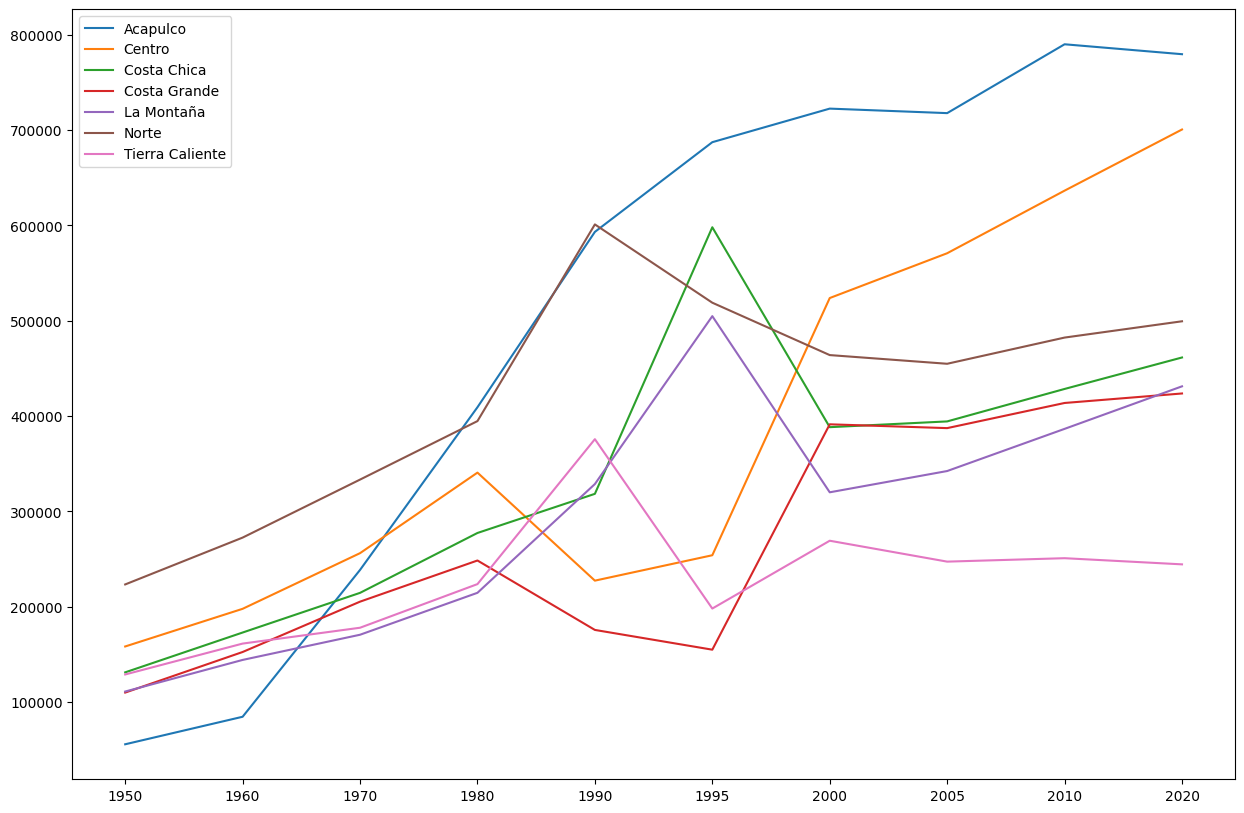

In [ ]:
ejx=df_ppa.columns.values
ejex = np.char.replace(ejx.astype('str'), 'Poblacion_', '')
fig,ax=plt.subplots(figsize=(15,10))
for x in np.arange(0,7): 
  ax.plot(ejex,df_ppa.iloc[x].values,label=df_ppa.index.to_list()[x])
  plt.legend()

In [ ]:
tc=pd.DataFrame()
for x in np.arange(0,9): 
  n=ejex[x+1].astype('float')-ejex[x].astype('float')
  tc[ejex[x+1]+'-'+ejex[x]]=(np.power(df_ppa.iloc[:,x+1]/df_ppa.iloc[:,x],(1/n))-1)*100

tc

,1960-1950,1970-1960,1980-1970,1990-1980,1995-1990,2000-1995,2005-2000,2010-2005,2020-2010
Region,,,,,,,,,
Acapulco,4.252612,10.914675,5.540775,3.779866,2.987916,1.004144,-0.131362,1.935546,-0.132501
Centro,2.250346,2.618498,2.889712,-3.961172,2.23934,15.567722,1.732539,2.200807,0.964615
Costa Chica,2.799898,2.177989,2.59944,1.389097,13.429801,-8.270563,0.309039,1.669544,0.744649
Costa Grande,3.322457,3.015508,1.925451,-3.406324,-2.476534,20.343952,-0.205223,1.325685,0.238203
La Montaña,2.645121,1.694849,2.318445,4.352608,8.956977,-8.709329,1.356274,2.459135,1.097889
Norte,2.006623,2.034752,1.703157,4.292923,-2.894653,-2.212929,-0.395993,1.179814,0.348537
Tierra Caliente,2.264343,0.984394,2.31359,5.318559,-12.011718,6.324558,-1.683638,0.289658,-0.260266


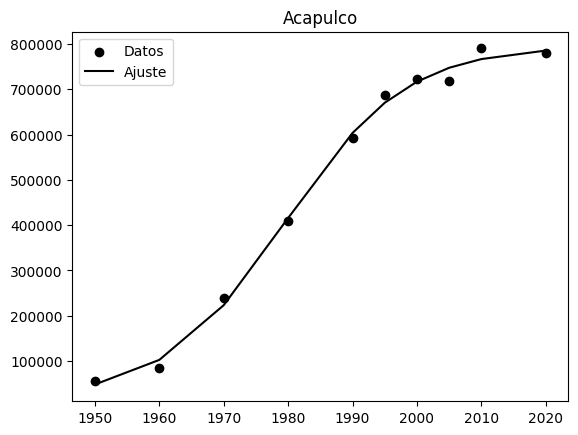

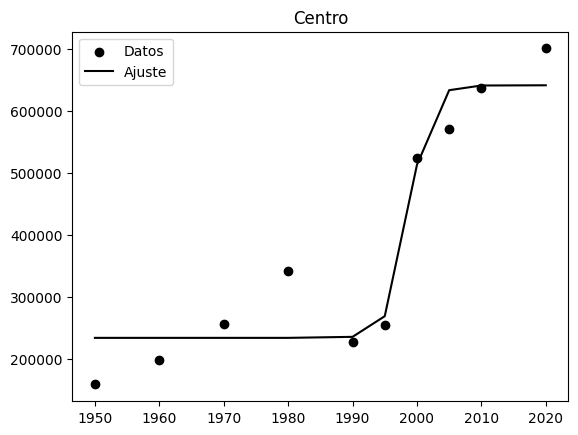

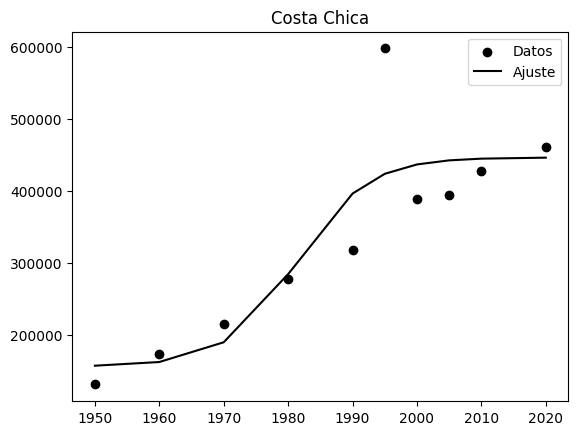

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


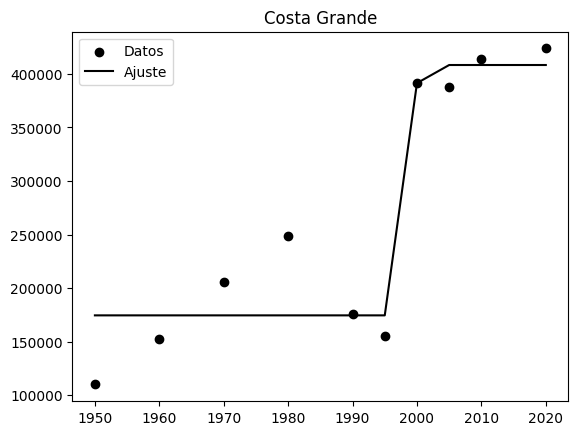

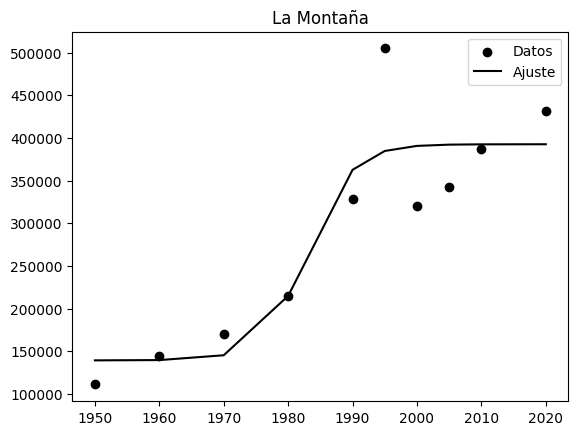

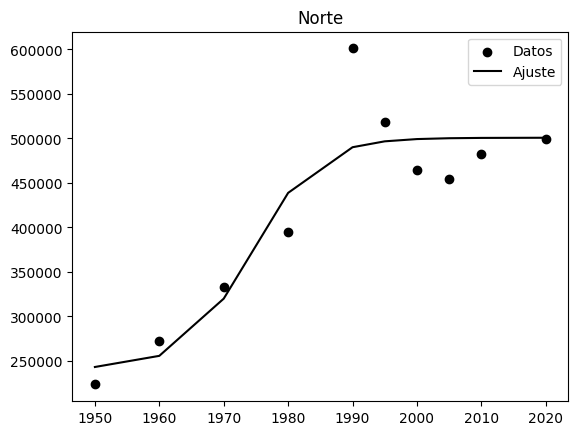

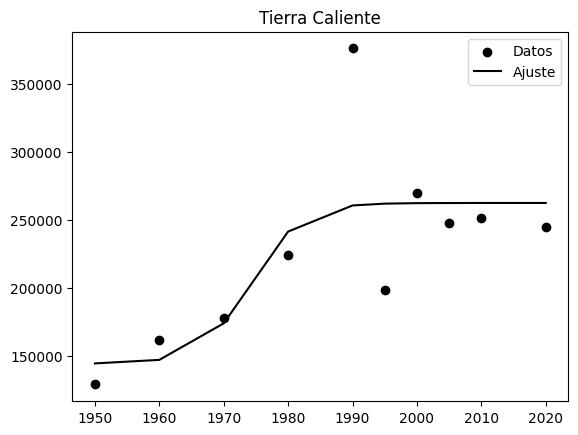

In [ ]:

ejex.astype('float')
a1=np.ones(7)
a2=np.ones(7)
xm0=np.ones(7)
dmx=np.ones(7)
R2=np.ones(7)
def sigmoid(x, A1, A2, x0, dx):
        return (A1 - A2) / (1 + np.exp((x - x0)/dx)) + A2


for w in np.arange(0,7):
  x_data = ejex.astype('float')
  y_data = df_ppa.iloc[w]

  # Ajuste de la curva
  popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])
  A1, A2, x0, dx = popt
  a1[w],a2[w],xm0[w],dmx[w]= A1,A2,x0,dx
  y_mean = np.mean(y_data)
  y_pred = sigmoid(x_data, A1, A2, x0, dx)
  SST = np.sum((y_data - y_mean)**2)
  SSE = np.sum((y_data - y_pred)**2)
  R2[w] = 1 - SSE/SST
  fig,ax=plt.subplots()
  ax.set_title(df_ppa.index.tolist()[w])
  ax.scatter(x_data, y_data, label='Datos',color='black')
  ax.plot(x_data, sigmoid(x_data, A1, A2, x0, dx), label='Ajuste',color='black')
  plt.legend()
  plt.show()
  y_mean = np.mean(y_data)
  y_pred = sigmoid(x_data, A1, A2, x0, dx)
  SST = np.sum((y_data - y_mean)**2)
  SSE = np.sum((y_data - y_pred)**2)
  R2[w] = 1 - SSE/SST


In [ ]:
####Prediccion de los siguientes años Acapulco####


x_data = np.array([1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([55862,84720 ,238713 ,409335 ,593212 ,687292 ,722499 ,717766 ,789971 ,779566])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

La población proyectada para el año 2030 es: 792060.4546093463
La población proyectada para el año 2040 es: 794385.8892577131
La población proyectada para el año 2050 es: 795188.872120666


In [ ]:
####Prediccion de los siguientes años CENTRO####
#,2020
#700593
x_data = np.array([1990, 1995, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([227473 ,254109 ,523845 ,570824 ,636464, 700593 ])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

La población proyectada para el año 2030 es: 650742.1766454871
La población proyectada para el año 2040 es: 650742.5757135304
La población proyectada para el año 2050 es: 650742.5804885506


In [ ]:
####Prediccion de los siguientes años Costa C####


x_data = np.array([1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([131297, 173054, 214662, 277463, 318506, 598072, 388416, 394455, 428501, 461500  ])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

La población proyectada para el año 2030 es: 446619.3657213569
La población proyectada para el año 2040 es: 446657.09517085843
La población proyectada para el año 2050 es: 446663.33093317586


In [ ]:
####Prediccion de los siguientes años Costa C#### SIN 1995


x_data = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([131297, 173054, 214662, 277463, 318506, 388416, 394455, 428501, 461500  ])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

La población proyectada para el año 2030 es: 491126.34149305365
La población proyectada para el año 2040 es: 512360.15183515043
La población proyectada para el año 2050 es: 527462.678783185


In [ ]:
####Prediccion de los siguientes años Tierra Caliente####


x_data = np.array([1950, 1960, 1970, 1980, 1990, 1995, 2000, 2005 ,2010 ,2020])  # Años
y_data = np.array([129070,161461,178078,223843,375831,198206,269330,247408 ,251012,244555 ])  # Poblaciones correspondientes a los años

# Ajustar la curva sigmoid
popt, pcov = curve_fit(sigmoid, x_data, y_data,[np.max(y_data),np.min(y_data), np.median(x_data)  ,(np.max(x_data) - np.min(x_data)) / 2 ])

# Extraer los parámetros ajustados
A1, A2, x0, dx = popt

y_pred_2030 = sigmoid(2030, A1, A2, x0, dx)
y_pred_2040 = sigmoid(2040, A1, A2, x0, dx)
y_pred_2050 = sigmoid(2050, A1, A2, x0, dx)

print("La población proyectada para el año 2030 es:", y_pred_2030)
print("La población proyectada para el año 2040 es:", y_pred_2040)
print("La población proyectada para el año 2050 es:", y_pred_2050)

La población proyectada para el año 2030 es: 262372.9894397011
La población proyectada para el año 2040 es: 262373.03679652355
La población proyectada para el año 2050 es: 262373.0402291924


In [ ]:
TR=pd.DataFrame({'A1':a1,'A2':a2,'x0':xm0,'dx':dmx,'R2':R2},index=df_ppa.index)
TR

,A1,A2,x0,dx,R2
Region,,,,,
Acapulco,16045.410836,795610.457667,1979.527216,9.368979,0.996603
Centro,233648.382231,641198.085106,1998.763153,1.590465,0.926362
Costa Chica,156356.911082,446664.565424,1981.299831,5.554656,0.768590
Costa Grande,174597.500000,408324.000000,1999.718186,0.110441,0.912385
La Montaña,139395.996592,392645.176775,1982.987923,3.492270,0.830399
Norte,241037.840221,500768.684735,1974.168008,5.025214,0.845213
Tierra Caliente,144337.485268,262373.040497,1974.163664,3.810434,0.555364
